In [1]:
!pip install SimpleITK

     |████████████████████████████████| 48.4 MB 1.8 MB/s 


In [2]:
import numpy as np
import SimpleITK as sitk
from matplotlib import pyplot as plt
import cv2

In [7]:
def loadMask(path):
    reader = sitk.ImageFileReader()
    reader.SetFileName(path)
    sitkMask = reader.Execute();
    mask = sitk.GetArrayFromImage(sitkMask)
    
    return mask

def showGrayScale(mask, title):
    plt.imshow(mask, cmap=plt.cm.gray)
    plt.title(title)
    plt.show()

def calculateIoU(groundTruthMask, predictedMask, showSteps = False):
    
    if showSteps:
        showGrayScale(groundtruthMask, "Ground Truth Mask")
        showGrayScale(predictedMask, "Predicted Mask")
    

    mask1 = np.where(groundtruthMask == 1, 1, 0).astype(np.uint8)
    mask2 = np.where(groundtruthMask == 2, 1, 0).astype(np.uint8)
    

   
    kernel = np.ones((3,3))

    erosion1 = cv2.erode(mask1, kernel, iterations=1) 
    dilation1 = cv2.dilate(mask1, kernel, iterations=1)

    erosion2 = cv2.erode(mask2, kernel, iterations=1) 
    dilation2 = cv2.dilate(mask2, kernel, iterations=1)
    

    erodedGroundtruth = np.zeros(groundtruthMask.shape, dtype = np.uint8)
    erodedGroundtruth[erosion1 == 1] = 1
    erodedGroundtruth[erosion2 == 1] = 2
    
    

    dilatedGroundtruth = np.zeros(groundtruthMask.shape, dtype = np.uint8)
    dilatedGroundtruth[dilation1 == 1] = 1
    dilatedGroundtruth[dilation2 == 1] = 2    
    

    intersection = np.where(np.logical_and(dilatedGroundtruth == predictedMask, dilatedGroundtruth != 0), 1, 0)        
    intersectionCount = np.count_nonzero(intersection)

    union = np.where(np.logical_or(erodedGroundtruth != 0, predictedMask != 0), 1, 0)
    unionCount = np.count_nonzero(union)

    score = intersectionCount / unionCount

    
    if showSteps:
        showGrayScale(intersection, "Intersection")
        showGrayScale(union, "Union")
        print('intersectionCount: ', intersectionCount)
        print('unionCount: ', unionCount)
        print('Score: ', score)
    
    
    return score

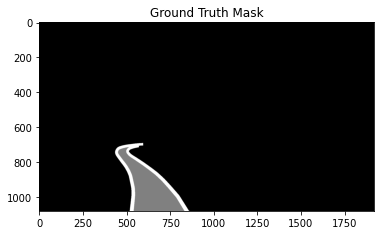

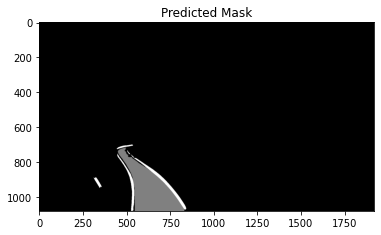

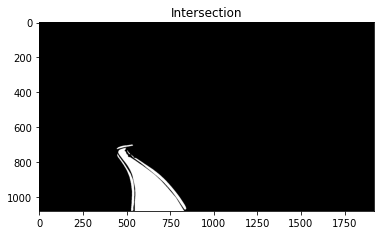

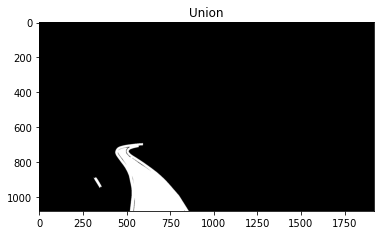

intersectionCount:  65576
unionCount:  75002
Score:  0.8743233513772966


0.8743233513772966

In [8]:

groundtruthMask = loadMask("GTmask.png")
predictedMask = loadMask("PredictMask.png")

calculateIoU(groundtruthMask, predictedMask, showSteps = True)